#  Title : Hand Written Digit Prediction


---





Objective: To build a system that can recognize numbers.

# Data Source


In [44]:
from sklearn.datasets import load_digits

# Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Description

In [46]:
df=load_digits()

In [48]:
df.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [49]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

# Data Visualization

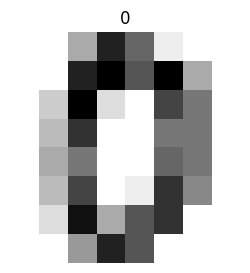

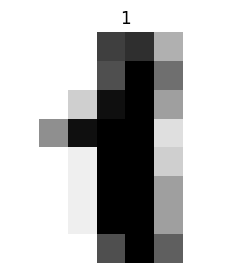

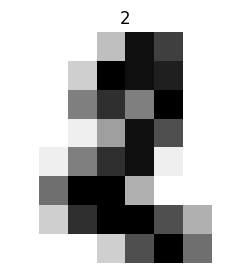

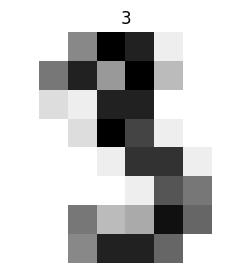

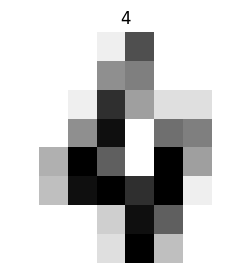

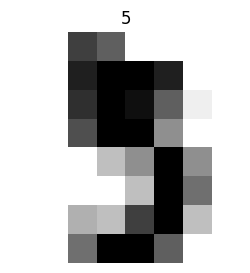

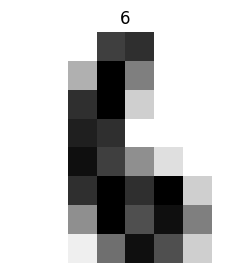

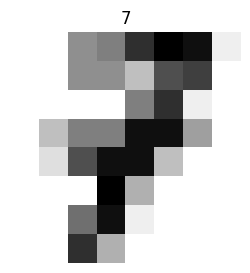

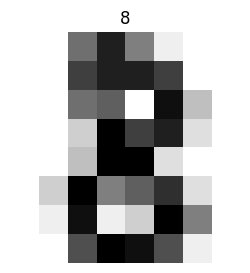

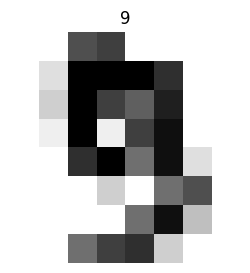

In [100]:
for i in range(10):
  _,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,3))
  axes.set_axis_off()
  axes.imshow(df.images[i],cmap=plt.cm.gray_r,interpolation="nearest")
  axes.set_title(i)

# Data processing

In [66]:
df.images.shape

(1797, 8, 8)

In [68]:
df.images[7]

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

In [69]:
df.images[0].shape

(8, 8)

In [71]:
len(df.images)

1797

In [73]:
samples=len(df.images)
data=df.images.reshape((samples,-1))

In [74]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [75]:
data[0].shape

(64,)

In [77]:
data.shape

(1797, 64)

# Scaling image data

In [78]:
data.min()

0.0

In [79]:
data.max()

16.0

In [80]:
data=data/16

In [81]:
data.min()

0.0

In [82]:
data.max()

1.0

In [83]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train test split data

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
xtrain,xtest,ytrain,ytest=train_test_split(data,df.target,test_size=0.3)

In [86]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random forest model

In [87]:
from sklearn.ensemble import RandomForestClassifier


In [88]:
rf=RandomForestClassifier()

In [89]:
rf.fit(xtrain,ytrain)


RandomForestClassifier()

# Predict test data

In [91]:
ypred=rf.predict(xtest)

In [92]:
ypred

array([4, 6, 3, 5, 9, 0, 1, 6, 2, 5, 6, 7, 5, 9, 8, 4, 4, 5, 6, 2, 4, 3,
       1, 3, 9, 1, 6, 4, 8, 0, 3, 1, 0, 4, 4, 4, 5, 1, 4, 1, 3, 5, 0, 5,
       3, 8, 6, 9, 1, 3, 6, 0, 3, 8, 3, 3, 6, 3, 7, 2, 7, 6, 5, 3, 7, 6,
       7, 4, 6, 2, 7, 0, 6, 1, 5, 4, 7, 4, 8, 1, 6, 1, 9, 1, 4, 0, 3, 0,
       3, 6, 3, 9, 4, 7, 1, 8, 4, 4, 2, 8, 2, 2, 6, 8, 5, 9, 0, 5, 1, 0,
       9, 0, 9, 6, 6, 0, 4, 6, 6, 2, 4, 4, 2, 7, 6, 3, 7, 0, 7, 9, 3, 1,
       9, 3, 1, 1, 0, 4, 2, 3, 7, 5, 5, 5, 0, 2, 0, 3, 4, 9, 7, 9, 9, 0,
       5, 6, 6, 6, 1, 1, 1, 2, 2, 4, 2, 0, 5, 2, 1, 8, 1, 5, 8, 6, 7, 3,
       3, 4, 0, 8, 0, 1, 7, 2, 0, 6, 4, 9, 4, 3, 4, 8, 0, 5, 7, 3, 0, 6,
       0, 1, 3, 6, 8, 3, 0, 1, 0, 8, 9, 1, 2, 6, 1, 8, 4, 7, 0, 1, 4, 8,
       0, 6, 4, 9, 1, 3, 9, 0, 9, 3, 5, 0, 2, 6, 2, 3, 2, 9, 4, 0, 1, 4,
       5, 1, 8, 6, 1, 2, 0, 5, 2, 8, 9, 5, 7, 7, 1, 3, 5, 3, 4, 6, 7, 2,
       6, 5, 8, 7, 1, 8, 2, 0, 6, 9, 8, 1, 4, 6, 9, 6, 1, 7, 9, 5, 2, 7,
       6, 7, 5, 1, 1, 6, 3, 5, 6, 4, 7, 9, 0, 4, 8,

# Accuracy

In [103]:
from sklearn.metrics import confusion_matrix,classification_report


In [104]:
confusion_matrix(ytest,ypred)

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  1,  0,  0,  3],
       [ 2,  1,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 48,  0,  0],
       [ 0,  2,  0,  0,  1,  0,  1,  0, 51,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 48]])

In [105]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.95      1.00      0.97        58
           2       1.00      1.00      1.00        43
           3       0.98      0.97      0.97        59
           4       0.97      1.00      0.98        59
           5       0.94      0.92      0.93        52
           6       0.97      0.95      0.96        60
           7       0.98      0.98      0.98        49
           8       1.00      0.93      0.96        55
           9       0.94      0.94      0.94        51

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# explanation

The digits consist of 8x8 pixel image of digits. The image attribute of the dataset stores 8x8 arrays of grayscale value for each image. We can use these arrays to visualize numbers from 0 to 9 which is stored in target attribute of the dataset.
After reshaping the dataset we parse it to train test and split using sklearn library.
We classify the dataset ytrain using random forest model and test for its accuracy after prediction.